# Preparing Visulisations for Paper

This notebook prepares visulisations for the paper. 

In [2]:
#from keras.utils import normalize
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
import glob
from keras.optimizers import Adam
import pandas as pd
import pybboxes as pbx
import matplotlib as mpl

### Detection: mAP Scores

In [3]:
data = pd.read_csv("../1-proximal-femur-detection/yolov5/runs/train/train/results.csv")

In [4]:
data.columns

Index(['               epoch', '      train/box_loss', '      train/obj_loss',
       '      train/cls_loss', '   metrics/precision', '      metrics/recall',
       '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', '        val/box_loss',
       '        val/obj_loss', '        val/cls_loss', '               x/lr0',
       '               x/lr1', '               x/lr2'],
      dtype='object')

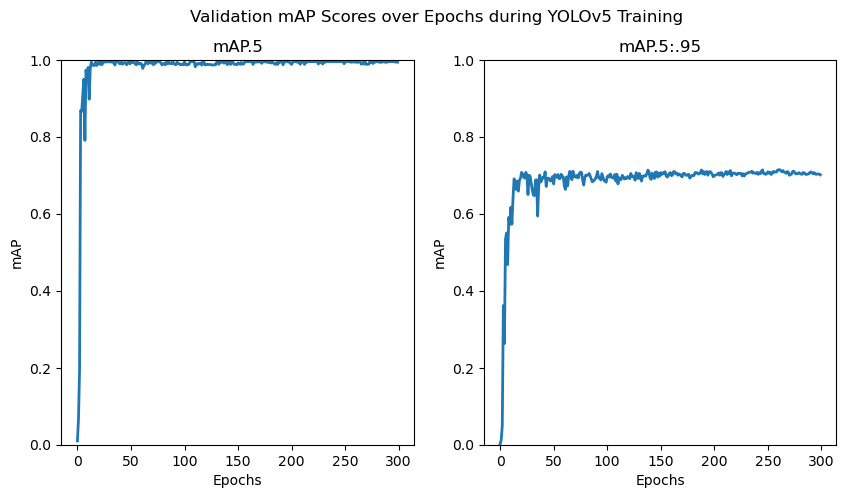

In [6]:
plt.style.use("default")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), constrained_layout=False)

ax1.plot(data['               epoch'], data['     metrics/mAP_0.5'], linewidth=2)
ax1.set_ylim([0,1])
ax1.set_xlabel("Epochs")
ax1.set_ylabel("mAP")
ax1.set_title("mAP.5")

ax2.plot(data['               epoch'], data['metrics/mAP_0.5:0.95'], linewidth=2)
ax2.set_ylim([0,1])
ax2.set_xlabel("Epochs")
ax2.set_ylabel("mAP")
ax2.set_title("mAP.5:.95")

fig.suptitle("Validation mAP Scores over Epochs during YOLOv5 Training")

fig.savefig("detection_maps.png")

### Segmentation: History Plot

In [7]:
# Best model, training results
seg = pd.read_csv("../2-proximal-femur-segmentation/output/history.csv")
seg[seg.val_loss == seg.val_loss.min()]

,Unnamed: 0,loss,accuracy,binary_accuracy,dice_score,io_u,binary_io_u,val_loss,val_accuracy,val_binary_accuracy,val_dice_score,val_io_u,val_binary_io_u
386,386,0.061588,0.946829,0.946829,0.940047,0.53751,0.885892,0.057234,0.954246,0.954246,0.942185,0.058784,0.899151


In [8]:
seg.columns

Index(['Unnamed: 0', 'loss', 'accuracy', 'binary_accuracy', 'dice_score',
       'io_u', 'binary_io_u', 'val_loss', 'val_accuracy',
       'val_binary_accuracy', 'val_dice_score', 'val_io_u', 'val_binary_io_u'],
      dtype='object')

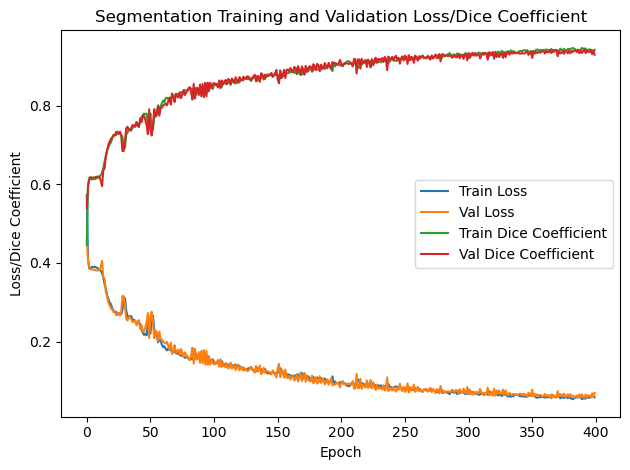

In [11]:
H = seg
epochs = 400

plt.style.use("default")
plt.figure()
plt.plot(np.arange(0, epochs), H["loss"], label="Train Loss")
plt.plot(np.arange(0, epochs), H["val_loss"], label="Val Loss")
plt.plot(np.arange(0, epochs), H["dice_score"], label="Train Dice Coefficient")
plt.plot(np.arange(0, epochs), H["val_dice_score"], label="Val Dice Coefficient")
plt.title("Segmentation Training and Validation Loss/Dice Coefficient")
plt.xlabel("Epoch")
plt.ylabel("Loss/Dice Coefficient")
plt.legend()
plt.tight_layout()
plt.savefig("segmentation_history.png")

### Segmentation: Overlay true and predicted boxes

In [10]:
def jimshow(image, title=False):
    """imshow with matplotlib dependencies 
    """
    # Acquire default dots per inch value of matplotlib
    dpi = mpl.rcParams['figure.dpi']

    height, width, depth = image.shape
    figsize = width / float(dpi), height / float(dpi)
    
    plt.figure(figsize=figsize)
    
    if depth == 1:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()
    
    #plt.savefig("figures/pred_true_yolo_4.png")

In [93]:
ex = ["025_07y06m06d_01", "001_14y08m05d_02", "013_08y01m24d_02_L","004_07y03m27d_01"]

In [186]:
img = cv2.imread(f"../1-proximal-femur-detection/yolov5/runs/detect/test/004_07y03m27d_01.tiff")
with open(f"data/labels/004_07y03m27d_01.txt") as f:
    annotations = f.readlines()

In [187]:
W, H = 1024, 1024
for a in annotations:
    yolo = tuple(map(float, a.split(" ")[1:]))
    bbox = pbx.convert_bbox(yolo, from_type="yolo", to_type="voc", image_width=W, image_height=H)
    cv2.rectangle(img, (bbox[0],bbox[1]), (bbox[2],bbox[3]), (0,255,0), 3) 

In [ ]:
jimshow(img)